In [1]:
import mglearn
plt.rcParams['axes.unicode_minus'] = False

In [2]:
!tree -dL 2 dataset/aclImdb/

dataset/aclImdb/
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos

6 directories


In [3]:
# !rm -r dataset/aclImdb/train/unsup/

In [4]:
from sklearn.datasets import load_files

In [5]:
reviews_train = load_files("dataset/aclImdb/train/")

text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입: {}".format(type(text_train)))
print("text_train의 길이: {}".format(len(text_train)))
print("text_train[6]: \n{}".format(text_train[6]))

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]: 
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [6]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [7]:
print("클래스별 샘플 수 (훈련 데이터): {}".format(np.bincount(y_train)))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [8]:
reviews_test = load_files("dataset/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

print("테스트 데이터의 문서 수: {}".format(len(text_test)))
print("클래스별 샘플 수 (테스트 데이터): {}".format(np.bincount(y_test)))

text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


In [9]:
# BOW 예시

bards_words = ["The fool doth think he is wise", 
               "but the wise man knows himself to be a fool"]

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
print("어휘 사전의 크기: {}".format(len(vect.vocabulary_)))
print("어휘 사전의 내용: {}".format(vect.vocabulary_))

어휘 사전의 크기: 13
어휘 사전의 내용: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [11]:
bag_of_words = vect.transform(bards_words)
print("BOW: {}".format(repr(bag_of_words)))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [12]:
print("BOW의 밀집 표현:\n{}".format(bag_of_words.toarray()))

BOW의 밀집 표현:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [13]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [14]:
feature_names = vect.get_feature_names()
print("특성 개수: {}".format(len(feature_names)))
print("처음 20개 특성: {}".format(feature_names[:20]))
print("20,010에서 20,030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 2,000번째 특성:\n{}".format(feature_names[::2000]))

특성 개수: 74849
처음 20개 특성: ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20,010에서 20,030까지 특성:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2,000번째 특성:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("교차 검증 평균 점수: {:.2f}".format(np.mean(scores)))

교차 검증 평균 점수: 0.88


In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개 변수: ", grid.best_params_)

최상의 교차 검증 점수: 0.89
최적의 매개 변수:  {'C': 0.1}


In [17]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train: {}".format(repr(X_train)))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [18]:
feature_names = vect.get_feature_names()

print("처음 50개 특성: {}".format(feature_names[:50]))
print("20,010에서 20,030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 700번째 특성:\n{}".format(feature_names[::700]))

처음 50개 특성: ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010에서 20,030까지 특성:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', 'r

In [19]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.89


In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("stopwords 개수: {}".format(len(ENGLISH_STOP_WORDS)))
print("매 10번째 stopwords:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

stopwords 개수: 318
매 10번째 stopwords:
['but', 'bill', 'or', 'top', 'nor', 'hasnt', 'latterly', 'when', 'neither', 'only', 'can', 'hence', 'side', 'own', 'hereby', 'former', 'against', 'mine', 'than', 'without', 'hers', 'been', 'this', 'an', 'go', 'next', 'before', 'somehow', 'three', 'many', 'amount', 'seem']


In [21]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("stopwords가 제거된 X_train:\n{}".format(repr(X_train)))

stopwords가 제거된 X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [22]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증: {:.2f}".format(grid.best_score_))

최상의 교차 검증: 0.88


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression()) # tf-idf + logisticregression
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증: {:.2f}".format(grid.best_score_))

최상의 교차 검증: 0.89


In [24]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print("tfidf가 가장 낮은 특성:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("tfidf가 가장 높은 특성:\n{}".format(feature_names[sorted_by_tfidf[-20:]]))

tfidf가 가장 낮은 특성:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
tfidf가 가장 높은 특성:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [25]:
sorted_by_tfidf = np.argsort(vectorizer.idf_)
print("idf가 가장 낮은 특성:\n{}".format(
    feature_names[sorted_by_tfidf[:100]]))

idf가 가장 낮은 특성:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


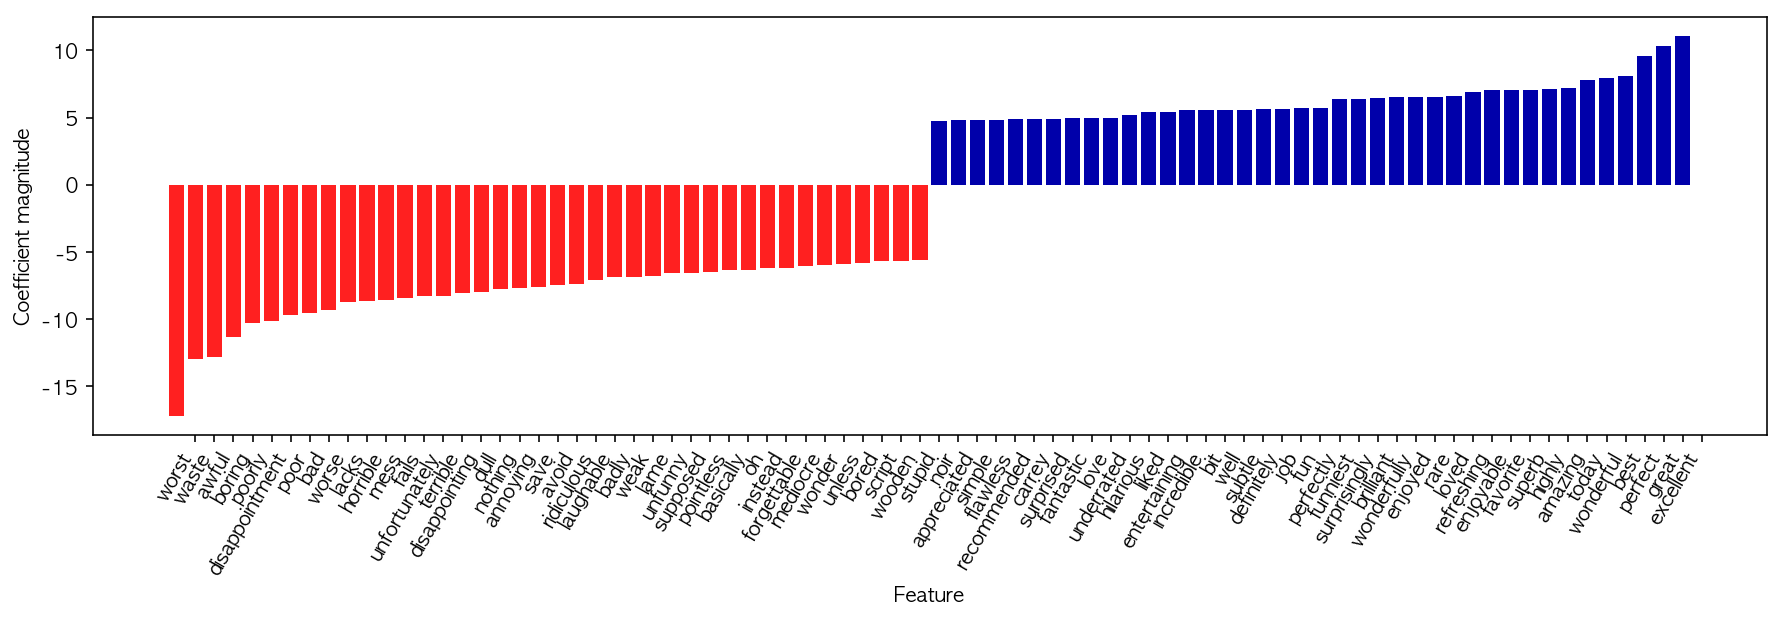

In [26]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0], 
    feature_names, n_top_features=40)

In [27]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100], 
              "tfidfvectorizer__ngram_range": [[1, 1], [1, 2], [1, 3]]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 검수: {:.2f}".format(grid.best_score_))
print("최적의 매개:\n{}".format(grid.best_params_))

최상의 교차 검증 검수: 0.91
최적의 매개:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': [1, 3]}


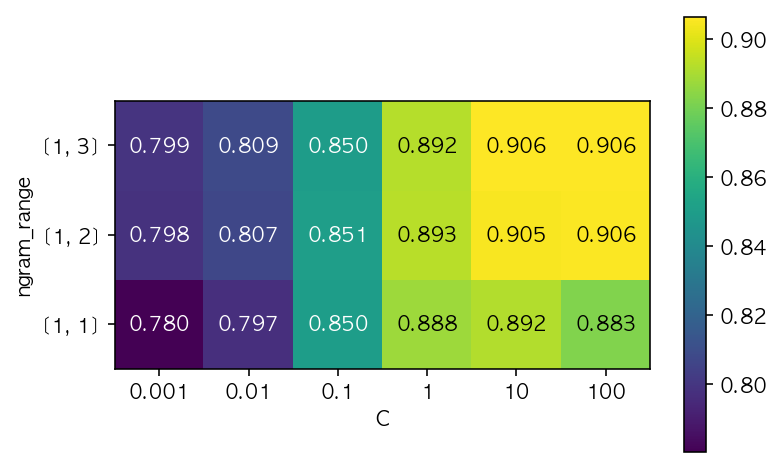

In [31]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid['logisticregression__C'], 
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

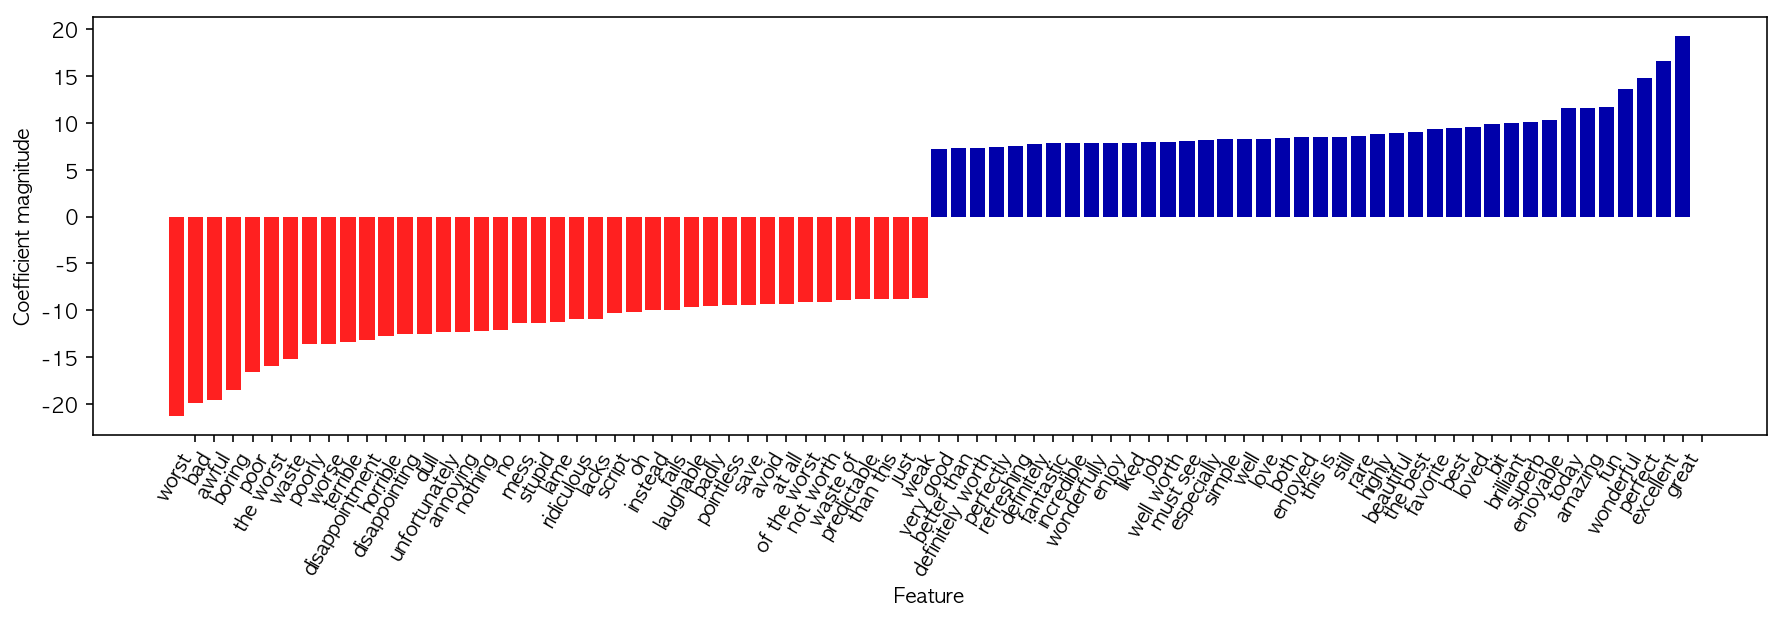

In [32]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

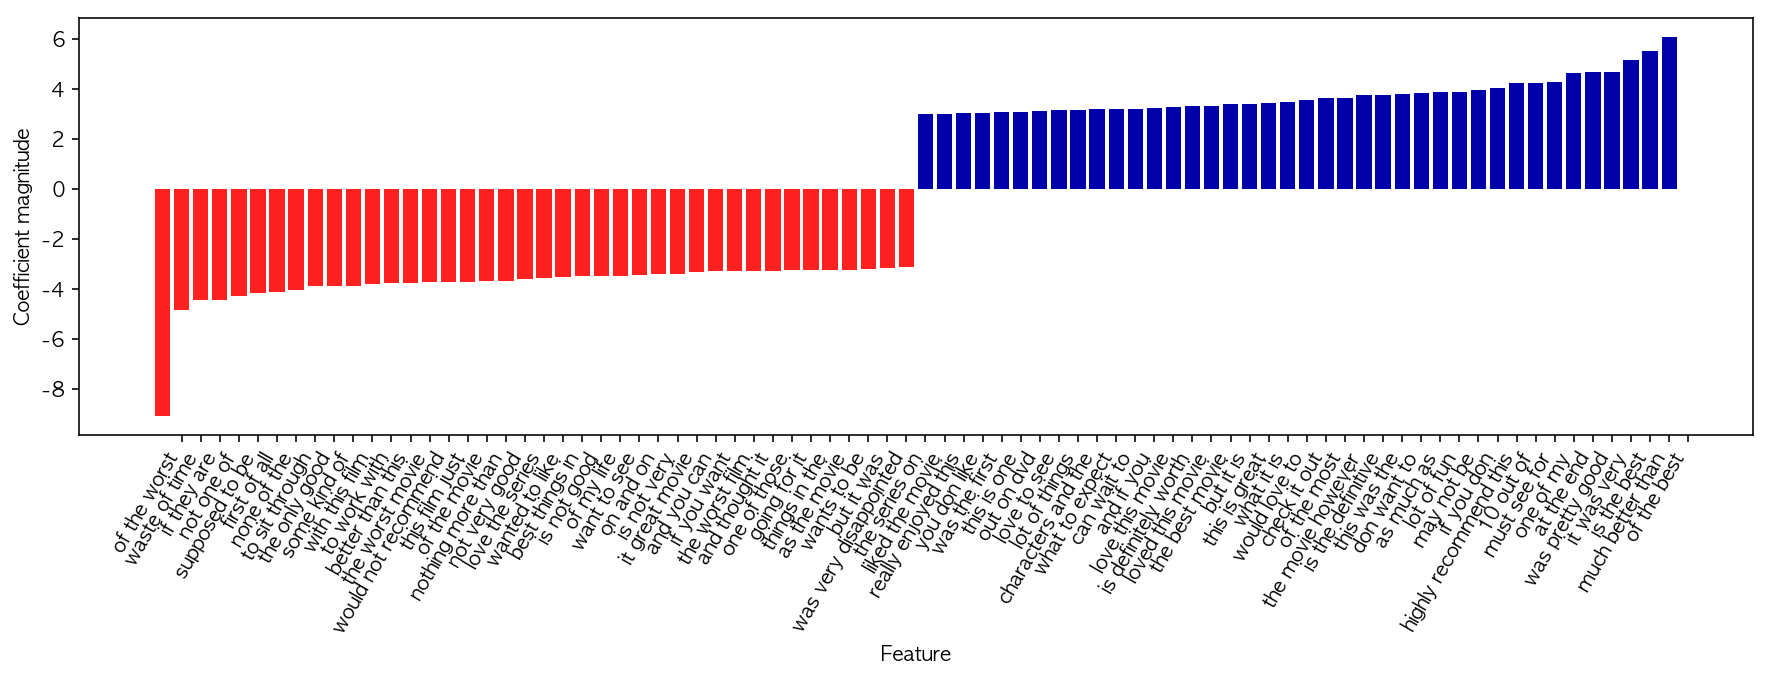

In [33]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask], 
                                     feature_names[mask], n_top_features=40)

In [34]:
import spacy
import nltk

In [44]:
# spacy의 영어 모델을 로드합니다
en_nlp = spacy.load('en')
# nltk의 PorterStemmer 객체를 만듭니다
stemmer = nltk.stem.PorterStemmer()

# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수입니다
def compare_normalization(doc):
    # spacy로 문서를 토큰화합니다
    doc_spacy = en_nlp(doc)
    # spacy로 찾은 표제어를 출력합니다
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    # PorterStemmer로 찾은 토큰을 출력합니다
    print("어간:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [46]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [51]:
# 요구사항: CountVectorizer의 정규식 기반 토큰 분할기를 사용하고
# spacy에서 표제어 추출 기능만 이용합니다.
# 이렇게하려고 en_nlp.tokenizer(spacy 토큰 분할기)를 
# 정규식 기반의 토큰 분할기로 바꿉니다
import re
# CountVectorizer에서 사용되는 정규식
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# spacy의 언어 모델을 로드하고 원본 토큰 분할기를 저장합니다
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# 정규식을 사용한 토큰 분할기를 바꿉니다
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기를 만듭니다
# (우리만의 토큰 분할기를 사용합니다)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 만듭니다
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [52]:
# 표제어 추출이 가능한 CountVectorizer 객체로 text_train을 변환합니다
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# 비교를 위해 표준 CountVectorizer를 사용합니다
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/Users/sunwoongkim/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenize

KeyboardInterrupt: 

In [53]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [54]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", 
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [55]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [56]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

In [57]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, 
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [58]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", 
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [59]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

In [62]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, 
                           sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

In [65]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

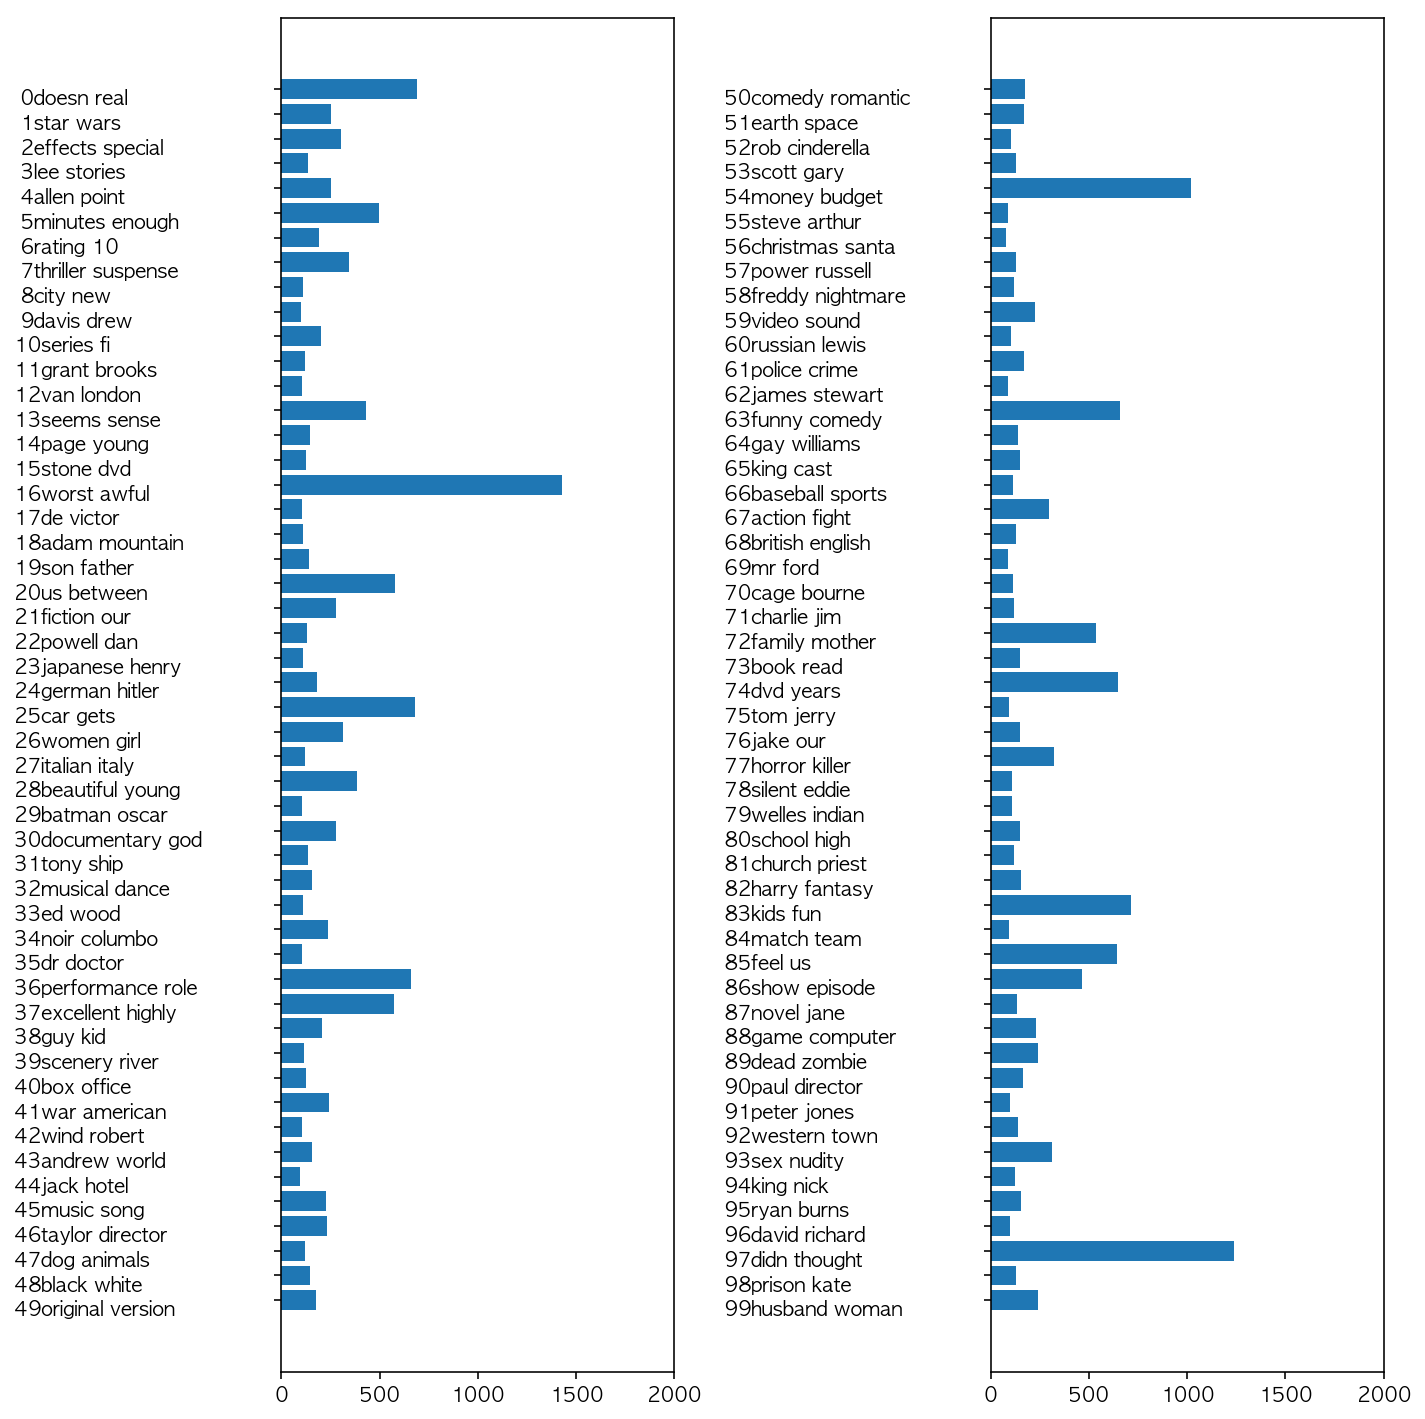

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()